## Labeling 
#### `Description:`
A $mask$ $image$ is a grayscale or binary image used to selectively hide or show parts of another image. Black pixels (value 0) typically indicate hidden/masked areas, while white pixels (value 1) show visible areas. Masks are commonly used in image processing for:

- Segmentation
- Background removal
- Blending multiple images
- Applying effects to specific regions

The example shown is a binary mask with all black pixels, indicating complete masking of the underlying content.  
This code processes and visualizes semantic segmentation masks:

1. Loads RGB image and mask image
2. Normalizes mask values to 0-1 range
3. Creates colored mask overlay (red channel)
4. Blends original and mask images with weights 0.7 and 0.3
5. Displays three images side by side:
   - Original RGB
   - Grayscale mask
   - Overlay (RGB + mask)

Key operations:
```python
# Normalize mask
mask_image = mask_image / mask_image.max()

# Create colored overlay
color_mask = np.zeros_like(rgb_image)
color_mask[..., 0] = mask_image * 255

# Blend images
overlay_image = cv2.addWeighted(rgb_image, 0.7, color_mask, 0.3, 0)
```

This visualization helps validate semantic segmentation results by showing labeled regions overlaid on the original image.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
RGB_IMG_PATH = "../Road_mask/train/tile_2_jpg.rf.4f0f010491d49db5aeba9a48a52a364a.jpg"
MASK_PATH =   "../Road_mask/train/tile_2_jpg.rf.4f0f010491d49db5aeba9a48a52a364a_mask.png"

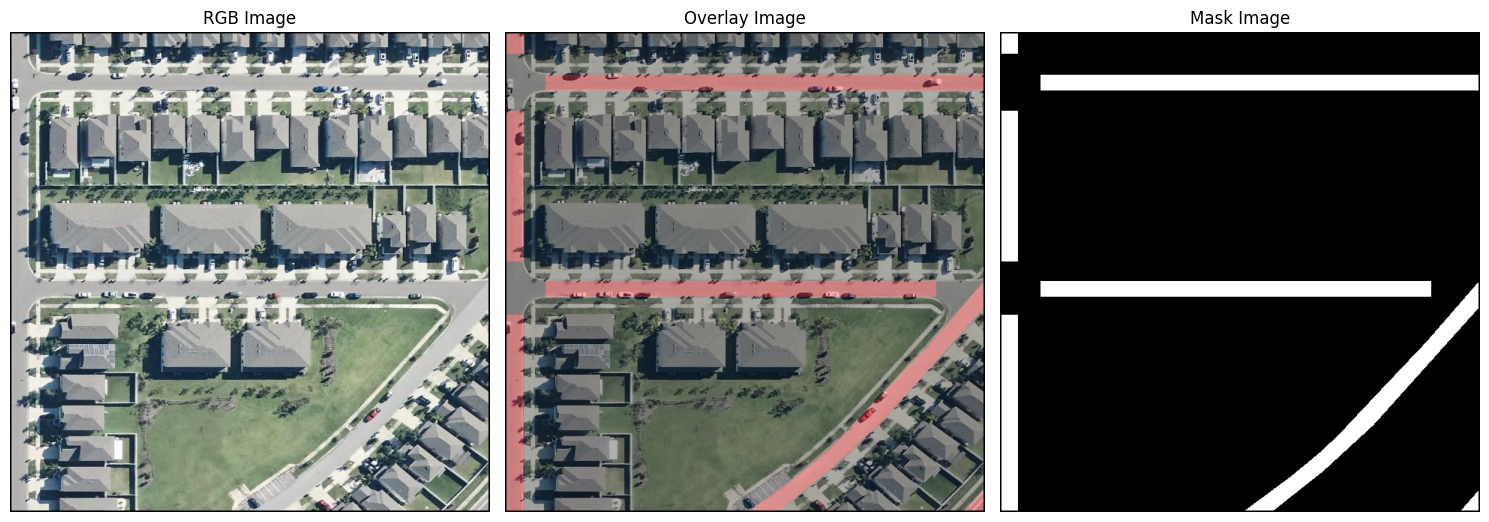

In [17]:

rgb_image = cv2.imread(RGB_IMG_PATH)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB) 

mask_image = cv2.imread(MASK_PATH, cv2.IMREAD_GRAYSCALE)
mask_image = mask_image / mask_image.max() 
color_mask = np.zeros_like(rgb_image)
color_mask[..., 0] = mask_image * 255 

overlay_image = cv2.addWeighted(rgb_image, 0.7, color_mask, 0.3, 0)


# Draw a frame around each image
frame_thickness = 2  # Thickness of the frame
green_color = (0, 0, 0)  

# Define a function to add a frame
def add_frame(image):
    height, width = image.shape[:2]
    # Draw rectangle around the image
    cv2.rectangle(image, (0, 0), (width-1, height-1), green_color, frame_thickness)
    return image

# Add frames to the images
rgb_image_with_frame = add_frame(rgb_image.copy())
mask_image_with_frame = add_frame(mask_image.copy())
overlay_image_with_frame = add_frame(overlay_image.copy())


# Plot images with frames
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('RGB Image')
plt.imshow(rgb_image_with_frame)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Overlay Image')
plt.imshow(overlay_image_with_frame)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Mask Image')
plt.imshow(mask_image_with_frame, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()
